In [1]:
# This cell loads the rdf extension. Run it!
%reload_ext jupyter-rdfify

In [ ]:
# This test cell will initialize the tests. All tests are hidden in this exercise.

The cell below defines some prefixes which you may and should use throughout the exercise sheet. You don't have to define them yourself. Run it or they won't work.

In [2]:
%%rdf turtle --prefix
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

Turtle: Stored prefix.


# Preliminary: Collections

Another part of the RDF vocabulary we haven't touched on yet are collections. A collection is a **closed list** of elements. This means that once we have defined a collection, we can't add more elements. For this we use the terms **rdf:first**, **rdf:rest** and **rdf:nil**. To define a collection of the last members of band The Beatles:

**ex:Beatles ex:lastMembers _:bn1 .  
_:bn1 rdf:first ex:JohnLennon .  
_:bn1 rdf:rest _:bn2 .  
_:bn2 rdf:first ex:PaulMcCartney .  
_:bn2 rdf:rest _:bn3 .  
_:bn3 rdf:first ex:GeorgeHarrison .  
_:bn3 rdf:rest _:bn4 .  
_:bn4 rdf:first ex:RingoStarr .  
_:bn4 rdf:rest rdf:nil .**

So every element of the collection is a blank node with an rdf:first property to the "value" of the element and an rdf:rest property to the next element. To close the collection, the rdf:rest property of the last element point to rdf:nil. Because this notation is very unreadable (even when using square brackets for blank nodes), there is syntactic sugar for defining collections. To define a collection we just write all its elements between parenthesis. For example, we define the same collection as above:

**ex:Beatles ex:lastMembers ( ex:JohnLennon ex:PaulMcCartney ex:GeorgeHarrison ex:RingoStarr ) .**

This is a lot more readable and easier to write. Use it whenever possible!

## Task 1: Monty Python [1 point]

Create a collection containing all members of the comedy troupe Monty Python. The members are: Graham Chapman, John Cleese, Terry Gilliam, Eric Idle, Terry Jones and Michael Palin.

Note: Even though lists have a fixed order, you can use any order you want in this exercise sheet as the tests will treat them as sets.

Please use the following URIs:  
Monty Python: **http://example.org/#MontyPython**  
members: **http://example.org/#members**  
Graham Chapman: **http://example.org/#Chapman**  
John Cleese: **http://example.org/#Cleese**  
Terry Gilliam: **http://example.org/#Gilliam**  
Eric Idle: **http://example.org/#Idle**  
Terry Johnes: **http://example.org/#Jones**  
Michael Palin: **http://example.org/#Palin**

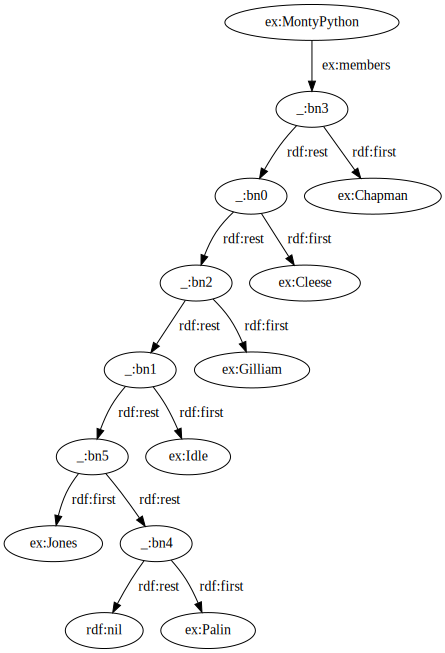

In [3]:
%%rdf turtle -l montypython
### YOUR SOLUTION HERE
@prefix ex: <http://example.org/#> .

ex:MontyPython ex:members (
    ex:Chapman
    ex:Cleese
    ex:Gilliam
    ex:Idle
    ex:Jones
    ex:Palin
) .

In [ ]:
# This test will check whether your graph contains the list and it contains the correct resources. [1 point]
# The order of the list does not matter.

# Data Modelling with OWL 2

Before, we used RDF Schema to write simple ontologies. These ontologies have the advantage that there are only a few rules, which makes an automated inference relatively efficient. But RDF Schema has very limited expressivity. For example we can't express that a class can only have a certain cardinality of a specific property or that a class is the intersection of two other classes.

The **Web Ontology Language (OWL)** is an ontology language like RDFS but can be used to model more complex concepts. OWL allows us to formulate expressions from **description logic** directly in RDF. As in RDFS, OWL defines three components: Individuals/Objects (concrete elements), Classes/Concepts (sets of objects) and Roles/Properties (which associate two individuals).

Most properties defined in the RDFS vocabulary can also be used when writing an ontology using OWL. For example **rdfs:subClassOf**, **rdfs:subPropertyOf**, **rdfs:range** and **rdfs:domain** can all be used together with OWL and have the same semantics.

For more information on certain topics please consult the [OWL 2 Primer](https://www.w3.org/TR/owl2-primer/). In [Section 1.2](https://www.w3.org/TR/2012/REC-owl2-primer-20121211/#OWL_Syntaxes) you can change the syntax of the examples to turtle.

## Classes

As in RDFS, we use **rdf:type** to declare that a resource belongs to a class. In OWL, the class of all classes is **owl:Class** so to declare that a resource is a class:

**ex:Professor a owl:Class .**

**owl:Thing** is the class of everything (similar to rdfs:Resource) and **owl:Nothing** is the empty class. Both are predefined.

## Properties

OWL distinguishes between abstract roles, which are properties with resources as range, and concrete roles, which have a data type as range. The class of all abstract roles is **owl:ObjectProperty** and the class of all concrete roles is **owl:DatatypeProperty**. An example for both types of roles:

**ex:belongsTo a owl:ObjectProperty ;  
&nbsp;&nbsp;&nbsp;&nbsp;rdfs:range ex:Organisation .  
ex:firstName a owl:DatatypeProperty ;  
&nbsp;&nbsp;&nbsp;&nbsp;rdfs:range xsd:String .  
ex:ProfDecker ex:belongsTo ex:I5 .  
ex:ProfDecker ex:firstName "Stefan" .**

ex:belongsTo is an abstract role because it has the class ex:Organisation as range. ex:firstName is a concrete role because it has the datatype xsd:String as range.

## Class Expressions

As in RDFS, we can use **rdfs:subClassOf** to define class hierarchies.

To specify that two classes are equivalent (contain the same individuals), OWL defines the property **owl:equivalentClass**. To define that the classes ex:Dog and ex:Dogs are equivalent, one would add the following triple:

**ex:Dog owl:equivalentClass ex:Dogs .**

To specify that two classes are disjoint (an individual from one class cannot belong to the other class), OWL defines the property **owl:disjointWith**. To define that the classes ex:Dog and ex:Cat are disjoint, one would add the following triple:

**ex:Dog owl:disjointWith ex:Cat .**

There is another notation to easily specify pairwise disjointness of more than two classes. For this one uses the class **owl:AllDisjointClasses**, the property **owl:members** and a collection of classes in a blank node. To specify that ex:Dog, ex:Cat and ex:Horse are pairwise disjoint, one would add the following:

**\[ rdf:type owl:AllDisjointClasses;  
owl:members ( ex:Dog ex:Cat ex:Horse ) \] .**

## Property Expressions

Analogous to classes, we can define property hierarchies with **rdfs:subPropertyOf**, equivalent properties with **owl:equivalentProperty** and disjoint properties with **owl:propertyDisjointWith** (or **owl:AllDisjointProperties** and **owl:member**).

You can also specify that a property is the inverse of another property with **owl:inverseOf**. To define that ex:owns is the inverse of ex:ownedBy, one would add the following triple:

**ex:own owl:inverseOf ex:ownedBy .**

## Property Classes

In OWL there are also many classes to assign certain characteristics to properties. For example, to define that the property ex:knows is reflexive (everybody knows himself), one would use the class **owl:ReflexiveProperty**:

**ex:knows a owl:ReflexiveProperty .**

Here is a list of all property classes in OWL 2:

[Reflexive](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_ReflexiveObjectProperty): **owl:ReflexiveProperty**  
[Irreflexive](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_IrreflexiveObjectProperty): **owl:IrreflexiveProperty**  
[Symmetric](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_SymmetricObjectProperty): **owl:SymmetricProperty**  
[Asymmetric](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_AsymmetricObjectProperty): **owl:AsymmetricProperty**  
[Transitive](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_TransitiveObjectProperty): **owl:TransitiveProperty**  
[Functional](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_FunctionalObjectProperty): **owl:FunctionalProperty**  
[Inverse Functional](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_InverseFunctionalObjectProperty): **owl:InverseFunctionalProperty**

Note: Concrete roles (owl:DatatypeProperty) can at most be functional.

## Assertions

OWL does not make the assumption that different URIs are automatically different individuals. For example, let's say we have the functional property ex:father (everyone can have at most one father -> functional) but we have the two triples:

**ex:Bart ex:father ex:Homer .  
ex:Bart ex:father ex:HomerSimpson .**

A reasoner that makes the unique-names assumption, would declare this graph as inconsistent because the ex:father property was earlier defined as functional (owl:FunctionalProperty). But an OWL reasoner does not make this assumption and instead infers that ex:Homer and ex:HomerSimpson are two names for the same individual. For this, OWL has two assertion properties, **owl:sameAs** and **owl:differentFrom**. To assert that ex:Homer and ex:HomerSimpson are the same person, one would add the following triple:

**ex:Homer owl:sameAs ex:HomerSimpson .**

Opposed to that, to assert that ex:Homer (greek author) and ex:HomerSimpson (cartoon character) are not the same person, one would add the following triple:

**ex:Homer owl:differentFrom ex:HomerSimpson .**

As with owl:AllDisjointClasses and owl:AllDisjointProperties, you can easily declare that multiple resources are pairwise different with **owl:AllDifferent** and **owl:member**.

Note: owl:sameAs can be used on individuals and classes and means that two URIs are names for the same resource. owl:equivalentClass can only be used on classes and means that two classes contain the same individuals.

### Negative Property Assertions

Another type of assertion in OWL are negative property assertions. These types of assertions can be used to assert that a triple does not hold. The syntax for this assertion is similar to the syntax of RDF reification and uses the class **owl:NegativePropertyAssertion** as well as the three properties **owl:sourceIndividual**, **owl:assertionProperty** and **owl:targetIndividual** in a blank node. For example, to assert that ex:Homer (greek author) is **not** the father of ex:Bart, one would add the following triples:

**\[ a owl:NegativePropertyAssertion ;  
owl:sourceIndividual ex:Bart ;  
owl:assertionProperty ex:father ;  
owl:targetIndividual ex:Homer \] .**

Note that positive property assertions are just facts (simple triples).

## Task 2: Exams [2 points]

Create an ontology about examiners and examinees using OWL 2 with the following information:

There are three classes: examinees, examiners and examinants. All examinants are examiners and conversely. An examinee cannot be an examiner and conversely. To be examined by someone or being the examiner of someone are both abstract roles and inverses of each other. Only examiners can be the examiner of someone and only examinees can be examined by someone.

Use the following URIs:  
Examiner: **http://example.org/#Examiner**  
Examinant: **http://example.org/#Examinant**  
Examinee: **http://example.org/#Examinee**  
examiner of: **http://example.org/#examinerOf**  
examined by: **http://example.org/#examinedBy**  

You may also use all OWL 2 and rdfs terms mentioned above this exercise.

**Note: In this and all following tasks, do not forget to assign classes like owl:Class and owl:ObjectProperty. The tests will check the non-entailed graphs. Even though some terms like rdfs:domain and rdfs:range originate from the RDFS vocabulary, they are still also a part of OWL 2.**

In [ ]:
%%rdf turtle -l exams
### YOUR SOLUTION HERE

In [ ]:
# This test will check whether you defined all classes and properties correctly. [1 point]

In [ ]:
# This test will check whether you defined all domains and ranges as well as class and property relationships correctly.
# [1 point]

## Task 3: The Friend Of An Enemy [6 points]

### 3a) Ontology [4 points]
Create an ontology about people and their relationships using OWL 2 with the following information:

Every individual (use **owl:Thing**, which is the class of all individuals) is a human and conversely. Having a friend, having an enemy and knowing someone are all abstract roles. The friend of a friend is also a friend. Having a friend or an enemy means knowing this person. You automatically are your friend's friend and your enemy's enemy. Everybody knows himself. Having a best friend and having a worst enemy are abstract roles as well. You can only have at most one best friend and at most one worst enemy (if you do not know how to model this, take a closer look at the [property classes](#Property-Classes) mentioned above). A best friend is also a friend and a worst enemy is also an enemy. An enemy cannot also be a friend and conversely.

Use the following URIs:  
Human: **http://example.org/#Human**  
Having a friend: **http://example.org/#hasFriend**  
Having a best friend: **http://example.org/#hasBestFriend**  
Having an enemy: **http://example.org/#hasEnemy**  
Having a worst enemy: **http://example.org/#hasWorstEnemy**  
Knowing someone: **http://example.org/#knows**  

You may also use all OWL 2 and rdfs terms mentioned above this exercise. Do not use cardinality constraints in this task.

Note: We can state that every individual is a human because ontologies can be domain specific. In this case our ontology is specific to a domain that only contains human individuals.

In [ ]:
%%rdf turtle -l friends
### YOUR SOLUTION HERE

In [ ]:
# This test will check whether you defined all classes and properties correctly. [1 point]

In [ ]:
# This test will check whether you defined all class and property relationships correctly. [1 point]

In [ ]:
# This test will check whether you defined all property classes (Symmetry, Transitivity, etc.) correctly. [2 points]

### 3b) Assertions [2 points]
Using the ontology from 3a (just use the vocabulary, you do not actually need to do 3a to get points for 3b), assert the following facts:

Harry's worst enemy is Lord Voldemort.  
Lord Voldemort and Tom Riddle are the same Person.  
Fred Weasley and George Weasley are **not** the same Person.  
Professor Snape is **not** Harry's enemy.

Use the following URIs:  
Harry: **http://example.org/#Harry**  
Lord Voldemort: **http://example.org/#Voldemort**  
Tom Riddle: **http://example.org/#Tom**  
Fred Weasley: **http://example.org/#Fred**  
George Weasley: **http://example.org/#George**  
Professor Snape: **http://example.org/#Snape**

You may also use all OWL 2 and rdfs terms mentioned above this exercise. You may also use all terms from 3a.

In [ ]:
%%rdf turtle -l hp
### YOUR SOLUTION HERE

In [ ]:
# This test will check whether the first three assertions are correct. [1 point]

In [ ]:
# This test will check whether the fourth assertion is correct. [1 point]

## Complex Classes

Before, we only defined classes and then assigned individuals to them. As classes are similar to sets (set theory) we may want to use set operators like the intersection, the union or the complement to combine them and create new classes. OWL 2 allows us to do just this using the terms **owl:intersectionOf**, **owl:unionOf** and **owl:complementOf**. For example, to create a class containing all parents as union of all mothers and all fathers, we would do it like this:

**\[ a owl:Class ;  
owl:unionOf ( ex:Mother ex:Father ) \] .**

Because we defined the class using only a blank node, it is an anonymous class which we can't refer to later and thus can only use once. To give our class a name, we use **owl:equivalentClass**. To give the class from the last example the name ex:Parent, we would do it like this:

**ex:Parent owl:equivalentClass \[  
&nbsp;&nbsp;&nbsp;&nbsp;a owl:Class ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:unionOf ( ex:Mother ex:Father )  
\] .**

Instead of owl:equivalentClass, we can also use **rdfs:subClassOf** to indicate necessary, but not sufficient, conditions for a class. For example, a grandfather has to be man and a parent but not everyone who is a man and a parent is also a grandfather:

**ex:Grandfather rdfs:subClassOf \[  
&nbsp;&nbsp;&nbsp;&nbsp;a owl:Class ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:intersectionOf ( ex:Man ex:Parent )  
\] .**

Remember that you can use anonymous classes everywhere (but only once because they have no name). This allows for nesting like this:

**ex:Jack  rdf:type \[  
&nbsp;&nbsp;&nbsp;&nbsp;rdf:type owl:Class ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:intersectionOf (  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ex:Person  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;\[ rdf:type owl:Class ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:complementOf ex:Parent \]  
&nbsp;&nbsp;&nbsp;&nbsp;)  
\] .**

This means that Jack is a person without a child.

## Task 4: Eating Utensils [4 points]

Use OWL complex classes to define the following classes:

The class of eating utensils is the same as all spoons, forks, knives or chopsticks.

The class of sporks is the same as everything that is a spoon and a fork.

The class of European eating utensils contains **at most** all eating utensils except chopsticks.  
(i.e., assume that there may be additional kinds of eating utensils besides the discussed ones.)

Use the following URIs:  
Eating utensil: **http://example.org/#Utensil**  
European eating utensil: **http://example.org/#EuropeanUtensil**  
Cutlery: **http://example.org/#Cutlery**  
Spoons: **http://example.org/#Spoon**  
Forks: **http://example.org/#Fork**  
Knifes: **http://example.org/#Knife**  
Chopsticks: **http://example.org/#Chopstick**  
Spork: **http://example.org/#Spork**

You may also use all OWL 2 and rdfs terms mentioned above this exercise.

In [ ]:
%%rdf turtle -l utensils --display raw
### YOUR SOLUTION HERE

In [ ]:
# This test will check whether your utensil class is correct. [1 point]

In [ ]:
# This test will check whether your spork class is correct. [1 point]

In [ ]:
# This test will check whether your European utensil class is modelled correctly. [1 point]

In [ ]:
# This test will check whether your European utensil class models the "at most" aspect. [1 point]

## Property Restrictions

Property restrictions are another type of constructor for complex classes. In contrast to before, where we constructed complex classes by combining other classes, we now construct classes by defining restrictions on properties of this class. For this, OWL defines the class **owl:Restriction** and the property **owl:onProperty**.

OWL provides different means to define the actual restriction of a given property, of which we will only cover some. Please note that we will only cover abstract property restrictions. If you're interested you can read up on datatype property restrictions in the [primer](https://www.w3.org/TR/2012/REC-owl2-primer-20121211/#Advanced_Use_of_Datatypes).

### Quantifier Restrictions

We can define existential and universal restrictions on properties. For this, OWL provides the terms **owl:allValuesFrom** for universal restrictions and **owl:someValuesFrom** for existential restrictions. To declare that all children of a parent have to be human, one would do it likes this:

**ex:Parent rdfs:subClassOf \[  
&nbsp;&nbsp;&nbsp;&nbsp;a owl:Restriction ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:onProperty ex:hasChild ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:allValuesFrom ex:Human  
\] .**

Note that using a universal quantifier property restriction does the same as using rdfs:range.

To declare that a parent has to have at least one human child, one would do it like this:

**ex:Parent rdfs:subClassOf \[  
&nbsp;&nbsp;&nbsp;&nbsp;a owl:Restriction ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:onProperty ex:hasChild ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:someValuesFrom ex:Human  
\] .**

We can now combine both quantifiers to define the class ex:Parent as everyone who has at least one human child and all children must be human:

**ex:Parent owl:equivalenClass \[  
&nbsp;&nbsp;&nbsp;&nbsp;a owl:Class ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:intersectionOf (  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;\[ a owl:Restriction ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:onProperty ex:hasChild ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:allValuesFrom ex:Human \]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;\[ a owl:Restriction ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:onProperty ex:hasChild ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:someValuesFrom ex:Human \]  
&nbsp;&nbsp;&nbsp;&nbsp;)  
\] .**

### Cardinality Restrictions

To get even more control over the possible properties of a class, OWL provides terms for the cardinality of properties.
Here, OWL distinguishes between two types of cardinality restrictions: Cardinality restrictions and qualified cardinality restrictions. Cardinality restrictions restrict how often a property can be used with a class, while qualified cardinality restrictions restrict the cardinality of a property together with a target class. For example, that someone must have exactly two parents is a simple cardinality restriction. A qualified cardinality restriction would be to say that someone must have exactly one parent who is a woman and one parent who is a man. So for normal restrictions we only need a cardinality while for a qualified restriction we also need a target class. For both types of restrictions there are three properties: One for exact cardinality and two for minimum and maximum cardinality.

Cardinality restrictions use **owl:cardinality**, **owl:minCardinality** and **owl:maxCardinality**:

**ex:Child owl:equivalentClass \[  
&nbsp;&nbsp;&nbsp;&nbsp;a owl:Restriction ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:onProperty ex:hasParent ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:cardinality "2"^^xsd:nonNegativeInteger  
\]**

Qualified cardinality Restrictions use **owl:onClass**, **owl:qualifiedCardinality**, **owl:minQualifiedCardinality** and **owl:maxQualifiedCardinality**:

**ex:Child owl:equivalentClass \[  
&nbsp;&nbsp;&nbsp;&nbsp;a owl:Class ;  
&nbsp;&nbsp;&nbsp;&nbsp;owl:intersectionOf (  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;\[ a owl:Restriction ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:onProperty ex:hasParent ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:onClass ex:Woman ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:qualifiedCardinality "1"^^xsd:nonNegativeInteger \]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;\[ a owl:Restriction ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:onProperty ex:hasParent ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:onClass ex:Man ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;owl:qualifiedCardinality "1"^^xsd:nonNegativeInteger \]  
&nbsp;&nbsp;&nbsp;&nbsp;)  
\] .**

## Task 5: Library [4 points]

Use OWL complex classes and property restrictions to define the following classes:

A customer is someone who borrows at least one kind of literature.  
(Do not use cardinality restrictions for this)

Model the following two restrictions for individuals of type Student using cardinality restrictions. The restrictions should both apply at the same time. Note, however that there may be additional restrictions applying to Students, which we do not model here but want to keep compatibility with.

A student may at most borrow 5 books.
A student may at most borrow 8 magazines.

Use the following URIs:  
Customer: **http://example.org/#Customer**  
Literature: **http://example.org/#Literature**  
Students: **http://example.org/#Student**  
Books: **http://example.org/#Book**  
Magazines: **http://example.org/#Magazine**  
borrows: **http://example.org/#borrows**

You may also use all OWL 2 and rdfs terms mentioned above this exercise.

In [ ]:
%%rdf turtle -l library
### YOUR SOLUTION HERE

In [ ]:
# This test will check whether your Customer class is correct. [1.5 points]

In [ ]:
# This test will check whether your Student class is correct. [2.5 points]